# Classification Assigment

In [64]:
# dataset upload
import pandas as pd 

ds = pd.read_csv("model.csv", index_col=0) #used for subsequent operations
ds1 = pd.read_csv("model.csv") #used to look for duplicates
ds

Gender  Age  Driving_License Licence_Type  Region_Code  \
id                                                               
1       Female   44                1            M           30   
2         Male   23                1            M            3   
3         Male   43                1            C           28   
4         Male   60                1            B           28   
5       Female   42                1            B           46   
...        ...  ...              ...          ...          ...   
102347  Female   25                1            B           32   
102348  Female   47                1            M           28   
102349    Male   72                1            M            8   
102350  Female   25                1            M           11   
102351    Male   70                1            D           28   

       Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
id                                                                     
1                      No    1-2 Year            Yes           25741   
2                     Yes    < 1 Year             No            2630   
3                      No    1-2 Year            Yes           70720   
4                     Yes    1-2 Year             No           48512   
5                      No    1-2 Year            Yes           32169   
...                   ...         ...            ...             ...   
102347                Yes    < 1 Year             No           34695   
102348                 No    1-2 Year            Yes           30564   
102349                 No   > 2 Years            Yes           52844   
102350                Yes    < 1 Year             No           26343   
102351                 No    1-2 Year            Yes            2630   

        Policy_Sales_Channel  Seniority  Target  
id                                               
1                        154        152       0  
2                        152        256       0  
3                         52        224       0  
4                         26         86       0  
5                        124        132       0  
...                      ...        ...     ...  
102347                   152        133       0  
102348                    26        114       1  
102349                   124         92       1  
102350                   152        127       0  
102351                   122         57       0  

[102351 rows x 12 columns]

Target
0    69878
1    32473
dtype: int64


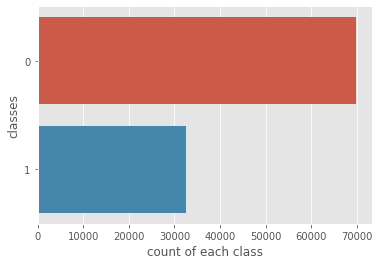

In [48]:
# Look at imbalancing of target
print(ds.groupby('Target').size()) #"target" is the name of the target column, change it accordingly to your dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=ds.Target ,data=ds) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

## Data pre-processing: DATA PREPARATION (validation, transformation, reduction) AND ESPLORATION (univ, bivar, multivar)
### -- DATA VALIDATION --

In [65]:
# inconsistency
# check if there are duplicate
ds1["id"].unique()

# no duplicate all value seems correct -> no inconsistency

array([     1,      2,      3, ..., 102349, 102350, 102351], dtype=int64)

In [66]:
# missing data

nan = ds.isna()
nan.sum(axis = 0, skipna = True) #5091 missing data from License_Type -> 4.97% with value 0/1 
# -> I think we should eliminate the row

Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [67]:
#dropping missing data

ds_dropna = ds.dropna(subset=['Licence_Type'])
print(ds_dropna.shape)

(97260, 12)


# Categorical variables

In [76]:
#check the variables type

ds_dropna.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [79]:
#Driving_License, Region_Code and Policy_Sales_Channel are actually categorical variables, 
#so we have to convert them in object-type variables

ds_dropna['Driving_License'] = ds_dropna['Driving_License'].astype('object')
ds_dropna['Region_Code'] = ds_dropna['Region_Code'].astype('object')
ds_dropna['Policy_Sales_Channel'] = ds_dropna['Policy_Sales_Channel'].astype('object')

In [80]:
ds_dropna.dtypes

Gender                  object
Age                      int64
Driving_License         object
Licence_Type            object
Region_Code             object
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel    object
Seniority                int64
Target                   int64
dtype: object

In [81]:
#split categorical variables from the dataset

ds_cat = ds_dropna.select_dtypes(include=['object']) #categorical
ds_cat

Gender Driving_License Licence_Type Region_Code Previously_Insured  \
id                                                                           
1       Female               1            M          30                 No   
2         Male               1            M           3                Yes   
3         Male               1            C          28                 No   
4         Male               1            B          28                Yes   
5       Female               1            B          46                 No   
...        ...             ...          ...         ...                ...   
102347  Female               1            B          32                Yes   
102348  Female               1            M          28                 No   
102349    Male               1            M           8                 No   
102350  Female               1            M          11                Yes   
102351    Male               1            D          28                 No   

       Vehicle_Age Vehicle_Damage Policy_Sales_Channel  
id                                                      
1         1-2 Year            Yes                  154  
2         < 1 Year             No                  152  
3         1-2 Year            Yes                   52  
4         1-2 Year             No                   26  
5         1-2 Year            Yes                  124  
...            ...            ...                  ...  
102347    < 1 Year             No                  152  
102348    1-2 Year            Yes                   26  
102349   > 2 Years            Yes                  124  
102350    < 1 Year             No                  152  
102351    1-2 Year            Yes                  122  

[97260 rows x 8 columns]

In [82]:
ds_cat.columns

Index(['Gender', 'Driving_License', 'Licence_Type', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel'],
      dtype='object')

In [83]:
#Converting categorical variables into boolean

dummies = pd.get_dummies(ds_cat[['Gender', 'Driving_License', 'Licence_Type', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']],drop_first=False)
dummies

Gender_Female  Gender_Male  Driving_License_1  Licence_Type_A  \
id                                                                      
1                   1            0                  1               0   
2                   0            1                  1               0   
3                   0            1                  1               0   
4                   0            1                  1               0   
5                   1            0                  1               0   
...               ...          ...                ...             ...   
102347              1            0                  1               0   
102348              1            0                  1               0   
102349              0            1                  1               0   
102350              1            0                  1               0   
102351              0            1                  1               0   

        Licence_Type_B  Licence_Type_C  Licence_Type_D  Licence_Type_M  \
id                                                                       
1                    0               0               0               1   
2                    0               0               0               1   
3                    0               1               0               0   
4                    1               0               0               0   
5                    1               0               0               0   
...                ...             ...             ...             ...   
102347               1               0               0               0   
102348               0               0               0               1   
102349               0               0               0               1   
102350               0               0               0               1   
102351               0               0               1               0   

        Region_Code_0  Region_Code_1  ...  Region_Code_50  Region_Code_51  \
id                                    ...                                   
1                   0              0  ...               0               0   
2                   0              0  ...               0               0   
3                   0              0  ...               0               0   
4                   0              0  ...               0               0   
5                   0              0  ...               0               0   
...               ...            ...  ...             ...             ...   
102347              0              0  ...               0               0   
102348              0              0  ...               0               0   
102349              0              0  ...               0               0   
102350              0              0  ...               0               0   
102351              0              0  ...               0               0   

        Region_Code_52  Previously_Insured_No  Previously_Insured_Yes  \
id                                                                      
1                    0                      1                       0   
2                    0                      0                       1   
3                    0                      1                       0   
4                    0                      0                       1   
5                    0                      1                       0   
...                ...                    ...                     ...   
102347               0                      0                       1   
102348               0                      1                       0   
102349               0                      1                       0   
102350               0                      0                       1   
102351               0                      1                       0   

        Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
id                                                                

# Numerical Variables

In [84]:
ds_num = ds_dropna.select_dtypes(include=['int64']) #numerical
ds_num

Age  Annual_Premium  Seniority  Target
id                                            
1        44           25741        152       0
2        23            2630        256       0
3        43           70720        224       0
4        60           48512         86       0
5        42           32169        132       0
...     ...             ...        ...     ...
102347   25           34695        133       0
102348   47           30564        114       1
102349   72           52844         92       1
102350   25           26343        127       0
102351   70            2630         57       0

[97260 rows x 4 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233D2904FC8>,
      dtype=object)

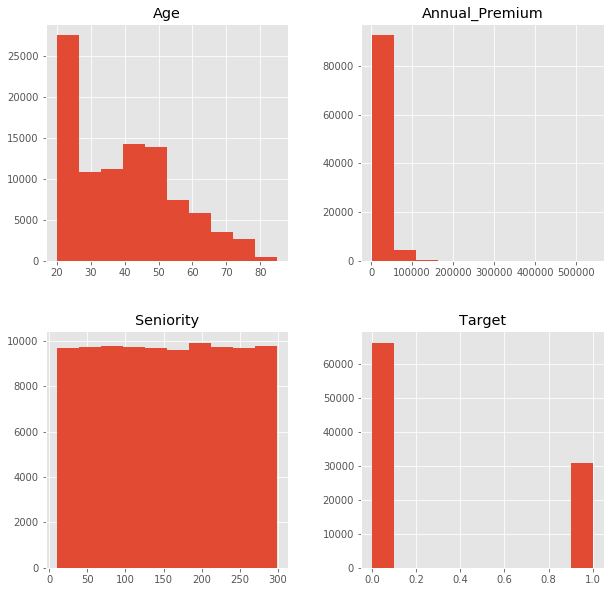

In [85]:
# operating with numerical variables

ds_num.hist(figsize=(10,10))

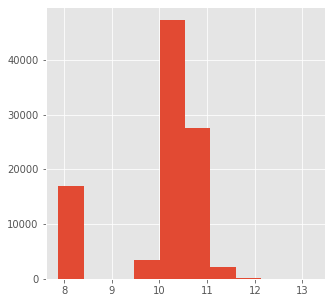

In [86]:
#log on Annual_Premium

import math
pd.options.mode.chained_assignment = None

ds_num['logPremium']=ds_num['Annual_Premium'].apply(math.log)

ds_num['logPremium'].hist(figsize=(5,5))

In [87]:
#pairplot
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
ds_num.columns

Index(['Age', 'Annual_Premium', 'Seniority', 'Target', 'logPremium'], dtype='object')

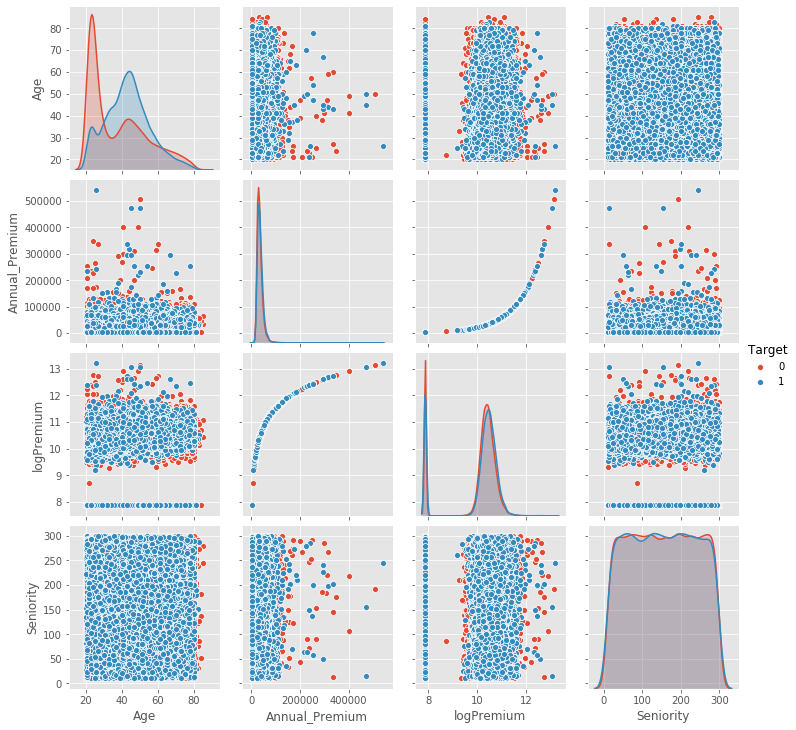

In [89]:
sns.pairplot(ds_num[['Age', 'Annual_Premium', 'logPremium', 'Seniority', 'Target',
       ]], hue='Target')

# Outliers

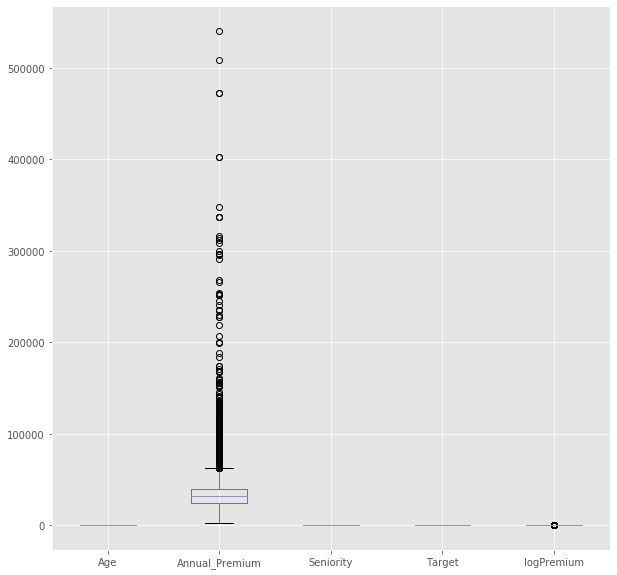

In [90]:
ds_num.boxplot(figsize=(10,10)) #boxplot for all the numerical variables

count    95317.000000
mean     29671.567800
std      15191.213299
min       2630.000000
25%      24216.000000
50%      31674.000000
75%      39143.000000
max      65876.000000
Name: Annual_Premium, dtype: float64

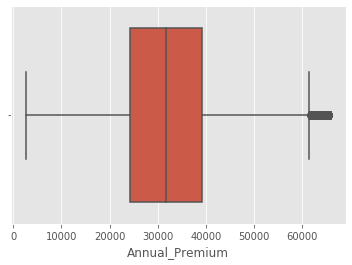

In [91]:
# noisy data (outliers) -> has sense doing that only for: Age; Region_Code; Annual_Premium; Policy_Sales_Channel; Seniority
import numpy as np

%matplotlib inline
import seaborn as sns

#sns.boxplot(x = ds['Age']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Region_Code']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Annual_Premium'])
#sns.boxplot(x = ds['Policy_Sales_Channel']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Seniority']) # Do not have outilers. all data keeped.

#ds["Annual_Premium"].describe()

#since it is normal then I CAN REMOVE OUTLIERS Using Normal Distribution and S.D
mean = ds_num["Annual_Premium"].mean()
sd = ds_num["Annual_Premium"].std()

# keep only the ones that are within +x to -x standard deviations in the column DIS
x = 2 # with 2 -> eliminate 2%, with 1 -> eliminate 28%
Annual_Premium = ds_num["Annual_Premium"]
Annual_Premium_noOutlier = Annual_Premium[ np.abs(Annual_Premium - mean) <= x * sd ]

#sns.boxplot(x = ds['Annual_Premium'])
sns.boxplot(x = Annual_Premium_noOutlier)

#ds["Annual_Premium"].describe()
Annual_Premium_noOutlier.describe()

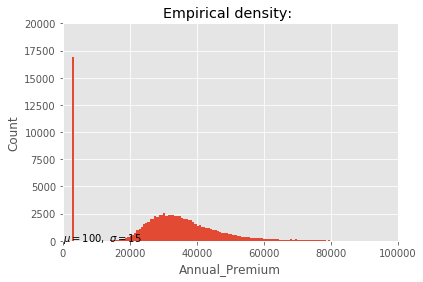

In [92]:
ds_num.hist(column="Annual_Premium",bins='auto')

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 20000)
plt.grid(True)
plt.show()

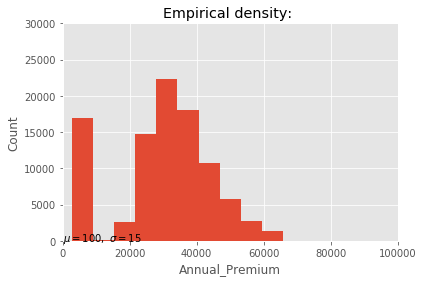

In [93]:
Annual_Premium_noOutlier.hist()

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 30000)
plt.grid(True)
plt.show()

In [96]:
# eliminate outliers data from ds
Annual_Premium_noOutlier1 = np.array(Annual_Premium_noOutlier.index)
ds_index = np.array(ds_num.index)
Annual_Premium_Outlier = np.delete(ds_index, Annual_Premium_noOutlier1)

ds_num_noOL = ds_num.drop(Annual_Premium_Outlier)


ds_num_noOL

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  after removing the cwd from sys.path.


Age  Annual_Premium  Seniority  Target  logPremium
id                                                        
2        23            2630        256       0    7.874739
3        43           70720        224       0   11.166484
5        42           32169        132       0   10.378759
6        40           34092        285       1   10.436818
7        26           22452         59       0   10.019135
...     ...             ...        ...     ...         ...
102347   25           34695        133       0   10.454351
102348   47           30564        114       1   10.327578
102349   72           52844         92       1   10.875099
102350   25           26343        127       0   10.178958
102351   70            2630         57       0    7.874739

[90581 rows x 5 columns]

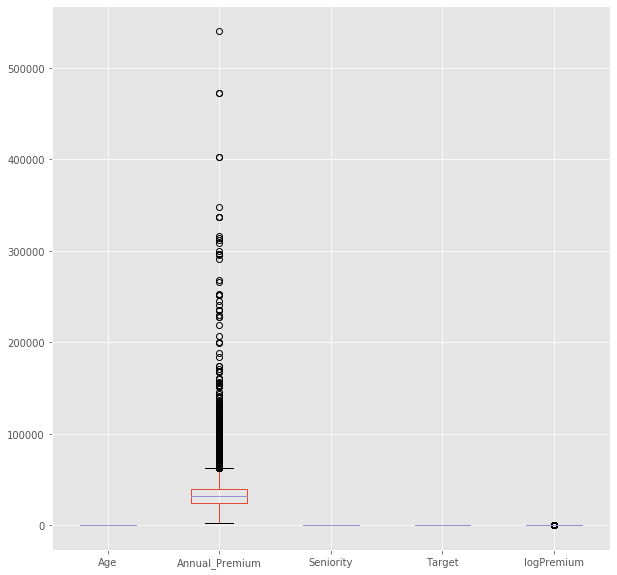

In [99]:
ds_num_noOL.boxplot(figsize=(10,10))

### -- DATA TRANSFORMATION --

# Standardization

In [101]:
#z-score
from sklearn.preprocessing import StandardScaler

zscaler = StandardScaler().fit(ds_num_noOL)
ds_zscaled = pd.DataFrame(zscaler.transform(ds_num_noOL))
ds_zscaled.columns = ds_num_noOL.columns

ds_zscaled

Age  Annual_Premium  Seniority    Target  logPremium
0     -1.128778       -1.600063   1.211143 -0.681145   -2.103712
1      0.209509        2.275612   0.828878 -0.681145    1.134648
2      0.142594        0.081294  -0.270135 -0.681145    0.359698
3      0.008766        0.190751   1.557571  1.468115    0.416816
4     -0.928035       -0.471797  -1.142177 -0.681145    0.005906
...         ...             ...        ...       ...         ...
90576 -0.994949        0.225073  -0.258189 -0.681145    0.434064
90577  0.477166       -0.010063  -0.485159  1.468115    0.309347
90578  2.150024        1.258112  -0.747966  1.468115    0.847989
90579 -0.994949       -0.250321  -0.329864 -0.681145    0.163137
90580  2.016196       -1.600063  -1.166069 -0.681145   -2.103712

[90581 rows x 5 columns]

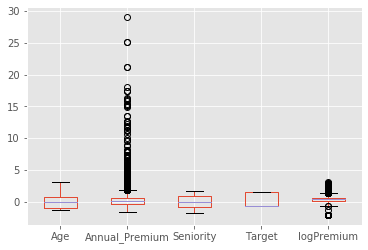

In [102]:
ds_zscaled.boxplot()

In [104]:
#minmax

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(copy=False,feature_range=(-1, 1)).fit(ds_num_noOL)
ds_mmscaled = pd.DataFrame(mmscaler.transform(ds_num_noOL))
ds_mmscaled.columns = ds_num_noOL.columns

ds_mmscaled

Age  Annual_Premium  Seniority  Target  logPremium
0     -0.907692       -1.000000   0.702422    -1.0   -1.000000
1     -0.292308       -0.746658   0.480969    -1.0    0.236361
2     -0.323077       -0.890095  -0.155709    -1.0   -0.059504
3     -0.384615       -0.882940   0.903114     1.0   -0.037697
4     -0.815385       -0.926249  -0.660900    -1.0   -0.194577
...         ...             ...        ...     ...         ...
90576 -0.846154       -0.880696  -0.148789    -1.0   -0.031112
90577 -0.169231       -0.896066  -0.280277     1.0   -0.078727
90578  0.600000       -0.813169  -0.432526     1.0    0.126919
90579 -0.846154       -0.911771  -0.190311    -1.0   -0.134548
90580  0.538462       -1.000000  -0.674740    -1.0   -1.000000

[90581 rows x 5 columns]

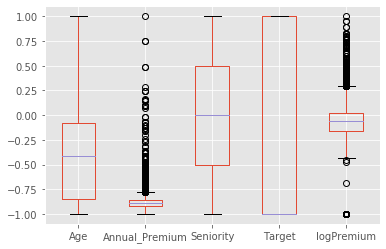

In [106]:
ds_mmscaled.boxplot()

In [ ]:
# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location,
# asimmetry of density curve, kurtosis

# ...code...

# check if normal probability fall in a streight line

# ...code...

In [ ]:
# feature extraction (make num atribute 2,4,6,7; new atributes; ...)

# ...code...

# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location

# ...code...

# check if normal probability fall in a streight line

# ...code...

### -- DATA REDUCTION --

In [ ]:
# reduce the number of obs (if needed) -> SAMPLING

# ...code...

In [ ]:
# reduce the number of feature/atributes 
# -> FEATURE SELECTION (filter [we can filter by correlation with target], wrapper)
# (!! no need in classification tree !! embedded)

# ...code...

# -> PCA

# ...code...

In [ ]:
# reduce the number of value (discretization -> pg 123 in pdf)

# ...code...

In [ ]:
# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location

# ...code...

# check if normal probability fall in a streight line

# ...code...

## Models

In [ ]:
# models

# ...code...